In [41]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
properties = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/inmuebles_bogota.csv')
properties = properties.rename(columns = {'Área':'Area','Baños':'Banos'})
properties.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [2]:
properties.Valor[0]

'$ 360.000.000'

In [3]:
type(properties.Valor[0])

str

In [6]:
properties.Valor[0].split(' ')

['$', '360.000.000']

In [7]:
type(properties.Valor)

pandas.core.series.Series

In [10]:
#Return a string representation, so we can apply the 'split' function
properties.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [12]:
#Return a Pandas Series
type(properties.Valor.str.split())

pandas.core.series.Series

In [17]:
#We can convert a Series into a DataFrame by using the 'expand' parameter
#in the 'split' function
price = properties.Valor.str.split(expand=True)
price

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [18]:
type(price)

pandas.core.frame.DataFrame

In [50]:
#We can add a new column to properties DataFrame
properties['Currency'] = price[0]
properties['Price'] = price[1]
properties.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price
2840,Apartamento,Apartamento en venta en Zona Noroccidental,2,2,54,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 285.000.000,$,285.000.000
7724,Apartamento,Apartamento en venta en Kennedy,3,2,53,Kennedy,Kennedy Central,$ 188.000.000,$,188.000.000


In [25]:
#The price is still a string, we need a number
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Currency      9520 non-null   object
 9   Price         9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [54]:
properties.Price = properties.Price.str.replace('.','',regex = True).astype('float')
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   object 
 8   Currency      9520 non-null   object 
 9   Price         9520 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 743.9+ KB


In [31]:
properties.sample(2)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Currency,Price
2728,Apartamento,Apartamento en venta en El Virrey,1,2,41,El Virrey,Comuneros,$ 480.000.000,$,480000000.0
5365,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 129.000.000,$,129000000.0


In [32]:
#Quick way to get descriptive statistics.
properties.describe()

,Habitaciones,Baños,Área,Price
count,9520.000000,9520.000000,9520.000000,9.520000e+03
mean,3.072479,2.447899,146.664706,6.020624e+08
std,2.049856,1.255314,1731.379622,7.046021e+08
min,1.000000,0.000000,2.000000,6.000000e+07
25%,2.000000,2.000000,57.000000,2.500000e+08
50%,3.000000,2.000000,80.000000,4.091825e+08
75%,3.000000,3.000000,135.000000,6.800000e+08
max,110.000000,9.000000,166243.000000,1.600000e+10


In [33]:
#Change output format from pandas
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
properties.describe()

,Habitaciones,Baños,Área,Price
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602062353.53
std,2.05,1.26,1731.38,704602061.61
min,1.00,0.00,2.00,60000000.00
25%,2.00,2.00,57.00,250000000.00
50%,3.00,2.00,80.00,409182500.00
75%,3.00,3.00,135.00,680000000.00
max,110.00,9.00,166243.00,16000000000.00


In [35]:
#Get properties that match with the condition
properties.loc[properties.Habitaciones > 100]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Currency,Price
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000.00


In [55]:
properties.loc[properties.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000.00


<Axes: ylabel='Frequency'>

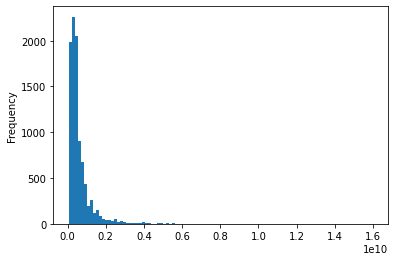

In [49]:
#Histogram gets Frequency of a var
properties.Price.plot.hist(bins=100)

In [59]:
#Add new column with price in M
properties['Price_M'] = properties.Price / 1000000
properties.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,Price_M
1992,Apartamento,Apartamento en venta en Barrios Unidos,3,2,71,Barrios Unidos,Los Andes,$ 520.000.000,$,520000000.00,520.00
1665,Casa,Casa en venta en Modelia,3,2,106,Modelia,Fontibón,$ 470.000.000,$,470000000.00,470.00


<Axes: ylabel='Frequency'>

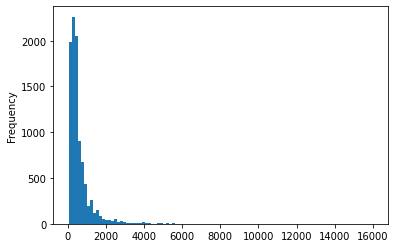

In [60]:
properties.Price_M.plot.hist(bins=100)

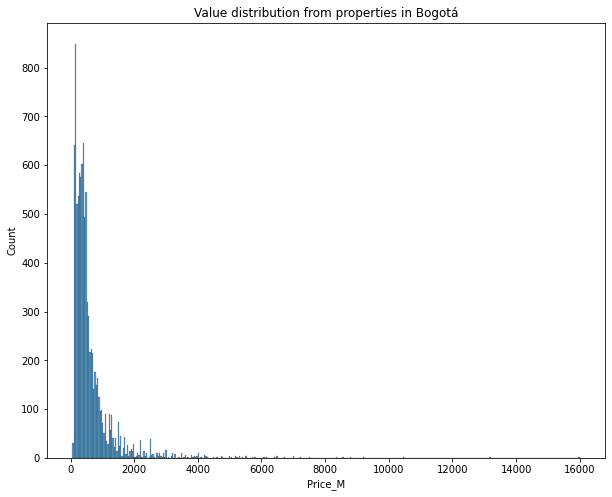

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set height and width for a new Figure
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M')
graph.set_title('Value distribution from properties in Bogotá')
plt.show()

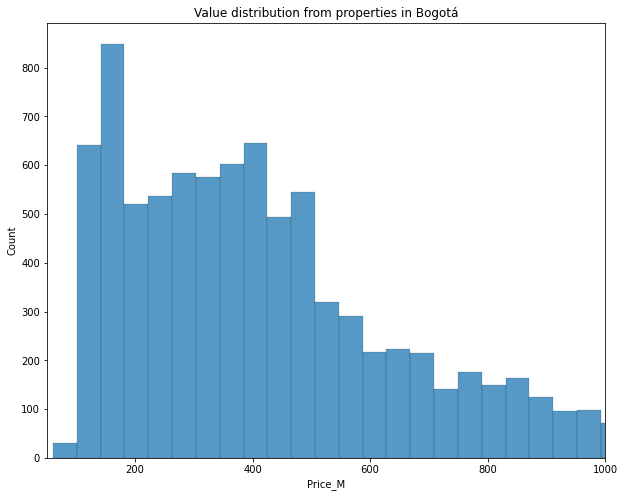

In [69]:
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M')
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.show()

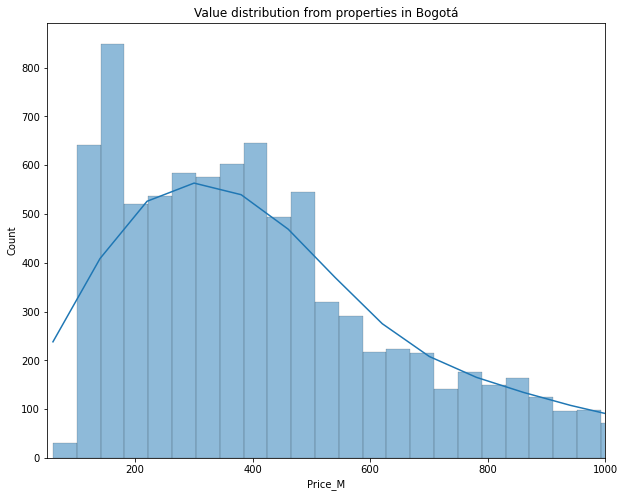

In [67]:
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M', kde=True)
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.show()

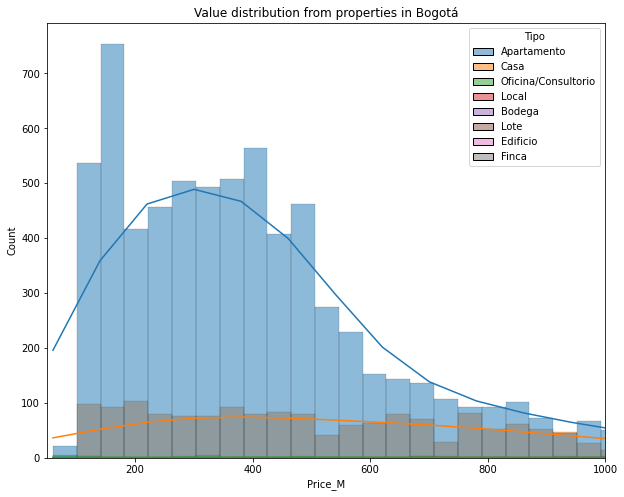

In [68]:
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M', kde=True, hue='Tipo')
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.show()

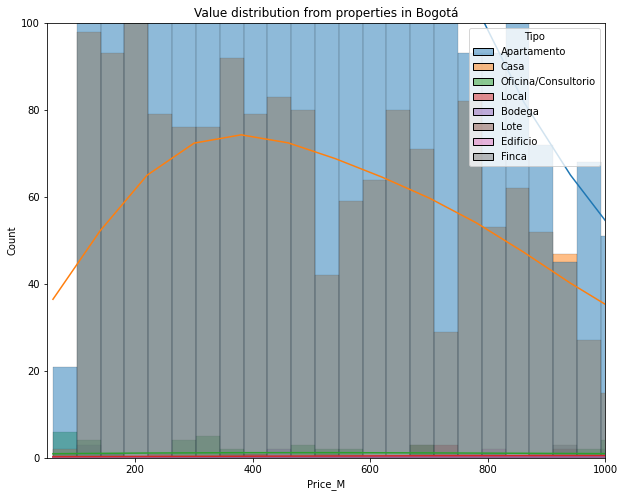

In [71]:
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M', kde=True, hue='Tipo')
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.ylim(0,100)
plt.show()

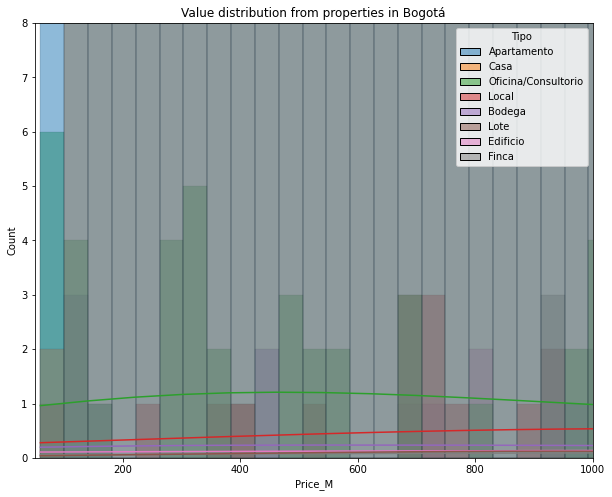

In [74]:
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M', kde=True, hue='Tipo')
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.ylim(0,8)
plt.show()

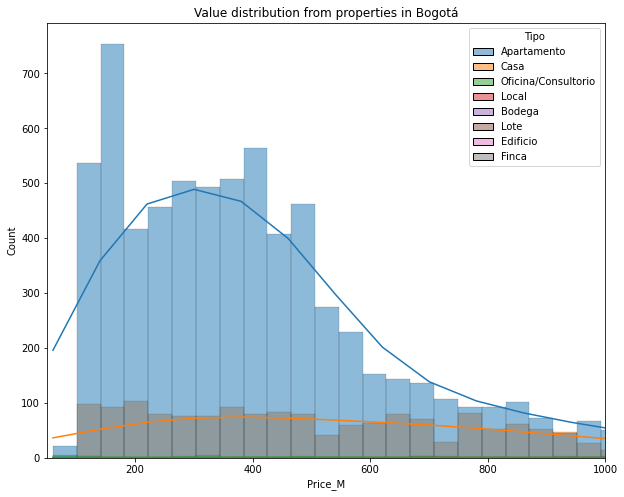

In [167]:
#Save the graph in png format
plt.figure(figsize = (10,8))
graph = sns.histplot(data=properties, x = 'Price_M', kde=True, hue='Tipo')
graph.set_title('Value distribution from properties in Bogotá')
plt.xlim(50, 1000) 
plt.savefig('/content/drive/MyDrive/Inmersion de Datos - Python/price_graph.png', format='png')


# **CHALLENGES**

1. **Study the value histogram more closely, select 3 types of properties (Refine the graph: Titles, increase label size, colors)**

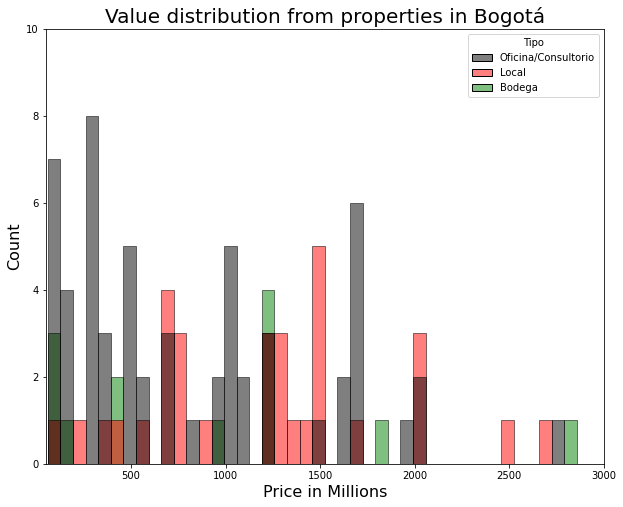

In [159]:
plt.figure(figsize = (10,8))
filtered_properties = properties.loc[
    (properties.Tipo == "Bodega") |
    (properties.Tipo == "Oficina/Consultorio") |
    (properties.Tipo == "Local")]
graph = sns.histplot(
    data=filtered_properties, 
    x = 'Price_M', 
    hue='Tipo',
    bins=100,
    palette = ['black', 'red', 'green'])
graph.set_title('Value distribution from properties in Bogotá', fontsize=20)
graph.set_xlabel("Price in Millions",fontsize=16)
graph.set_ylabel("Count", fontsize=16)

plt.xlim(50, 3000) 
plt.ylim(0,10)
plt.show()

2. **Price per m2 by neighborhood and make the most suitable graph for this new variable.**

In [166]:
properties['Price_M2_Million'] = properties.Price_M / properties.Area
properties.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,Price_M,Price_M2_Million
6143,Apartamento,Apartamento en venta en Bosa,2,1,42,Bosa,Bosa Central,$ 111.000.000,$,111000000.00,111.00,2.64
3404,Apartamento,Apartamento en venta en Mazuren,3,2,120,Mazuren,El Prado,$ 390.000.000,$,390000000.00,390.00,3.25


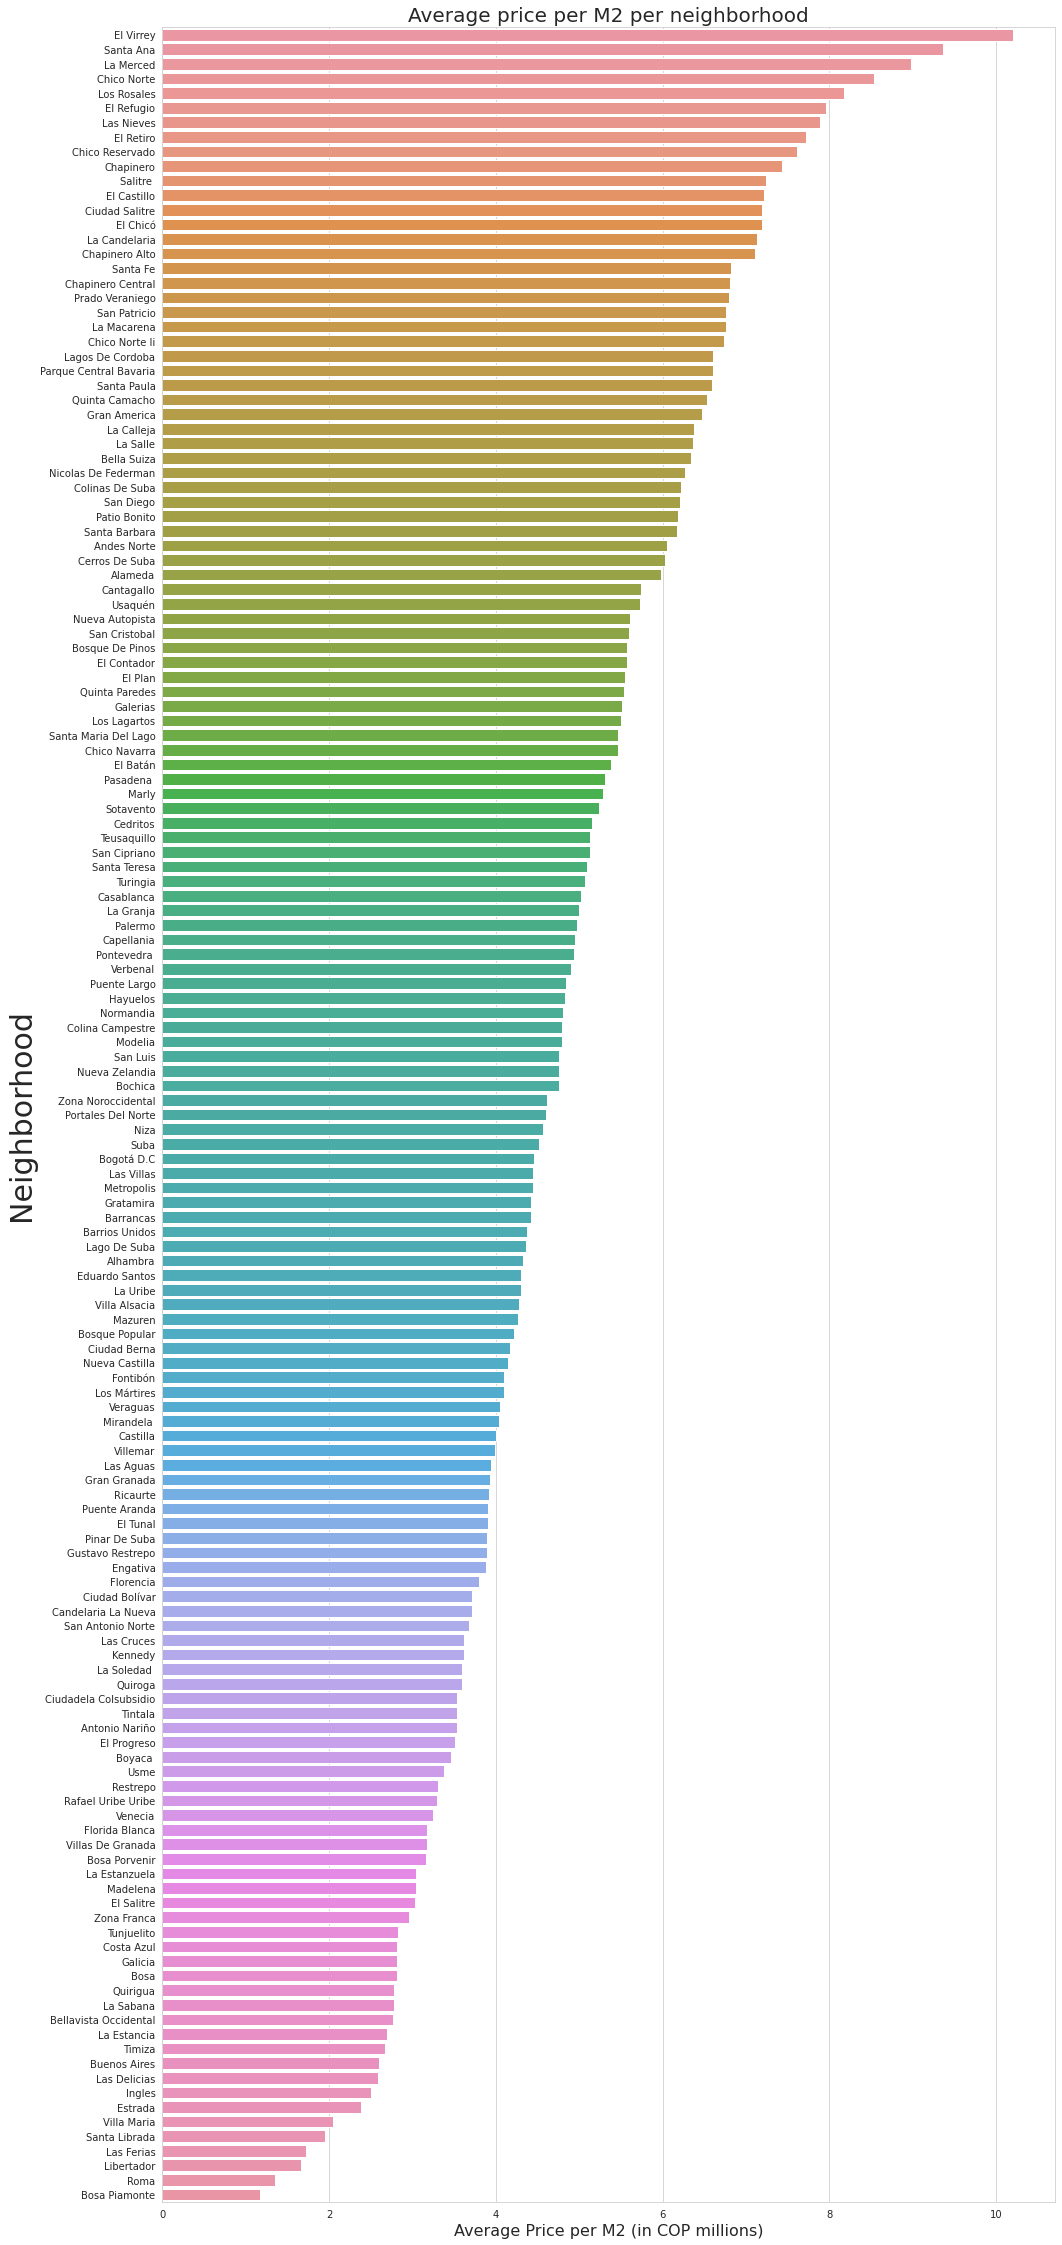

In [233]:
price_m2_by_neighborhood = properties.groupby(by = 'Barrio').Price_M2_Million.mean().sort_values(ascending=False)

sns.set_style("whitegrid") 
plt.figure(figsize=(16, 40)) 
sns.barplot(
    x=price_m2_by_neighborhood.values, 
    y=price_m2_by_neighborhood.index)
plt.title("Average price per M2 per neighborhood", fontsize=20)
plt.ylabel("Neighborhood",  fontsize=30) 
plt.xlabel("Average Price per M2 (in COP millions)",  fontsize=16)
plt.show() 
